<a href="https://colab.research.google.com/github/Dcodinginsane/Pandas-for-Data-Analysis/blob/main/Global_superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA) is a crucial step in understanding and summarizing the main characteristics of a dataset. To perform EDA on the Global Superstore data using Python, you can use various libraries such as Pandas, Matplotlib, Seaborn, and NumPy. Below is a step-by-step guide on how you can conduct EDA on the Global Superstore dataset:

Data Descriptions - this gobal supersote data

In [34]:
# import the standar libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv("superstore.csv")

data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [36]:
# data informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [37]:
data.shape

(51290, 27)

In [38]:
# statics summary  of our data
data.describe().style.background_gradient(cmap='twilight')

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.000000,28.610982,3.476545,25645.500000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.000000,174.340972,2.278766,14806.291990,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.000000,-6599.978000,1.000000,1.000000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.000000,0.000000,2.000000,12823.250000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.000000,9.240000,3.000000,25645.500000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.000000,36.810000,5.000000,38467.750000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.000000,8399.976000,14.000000,51290.000000,22638.000000,933.570000,2014.000000,53.000000


In [39]:
# counting the null values in our data
data.isna().sum()/len(data)*100

Category          0.0
City              0.0
Country           0.0
Customer.ID       0.0
Customer.Name     0.0
Discount          0.0
Market            0.0
记录数               0.0
Order.Date        0.0
Order.ID          0.0
Order.Priority    0.0
Product.ID        0.0
Product.Name      0.0
Profit            0.0
Quantity          0.0
Region            0.0
Row.ID            0.0
Sales             0.0
Segment           0.0
Ship.Date         0.0
Ship.Mode         0.0
Shipping.Cost     0.0
State             0.0
Sub.Category      0.0
Year              0.0
Market2           0.0
weeknum           0.0
dtype: float64

In [40]:
counting_duplicate = data.duplicated().sum()
print(f'the global-superstore conatin {counting_duplicate} value in the data')

the global-superstore conatin 0 value in the data


In [41]:
# checking the categorical column and numerical colum
categorical_coumns = [row for row in data if data[row].dtypes == 'object']
Numerical_columns = [ col for col in data if data[col].dtypes =='int']

In [42]:
print(categorical_coumns , Numerical_columns)

['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID', 'Product.Name', 'Region', 'Segment', 'Ship.Date', 'Ship.Mode', 'State', 'Sub.Category', 'Market2'] ['记录数', 'Quantity', 'Row.ID', 'Sales', 'Year', 'weeknum']


# Explore Data Analysis process
1. Create barplots to identify the most selling items in the data across different categorical columns
2. Use groupby function to find the top 10 most profitable countries in the data
3. Visualize  monthly revenue using datetime funtion and a line chart
4. Use boxplots to explore the variation of profit and quantity across different months
5. Visualize the distributio of profit and quantity

6. Find the top 10 cities with the highest shipping costs
7. Use barplot to compare category-wise profit and sales



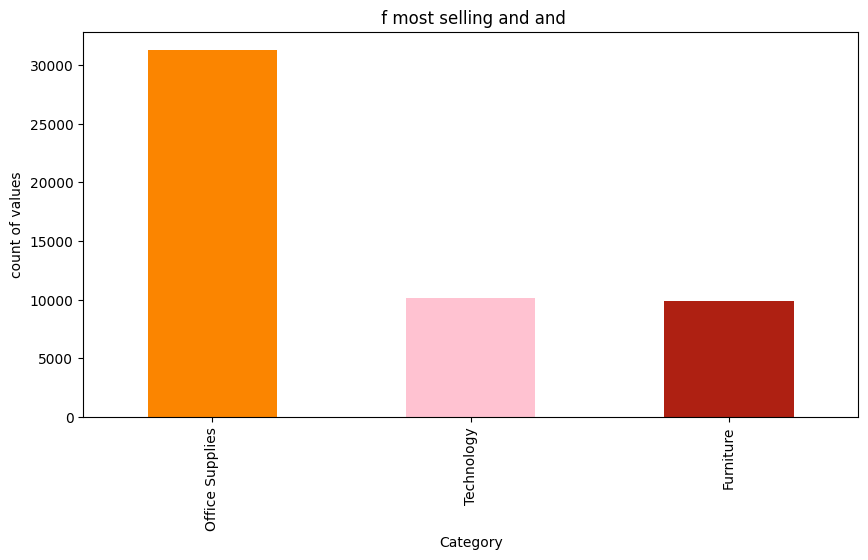

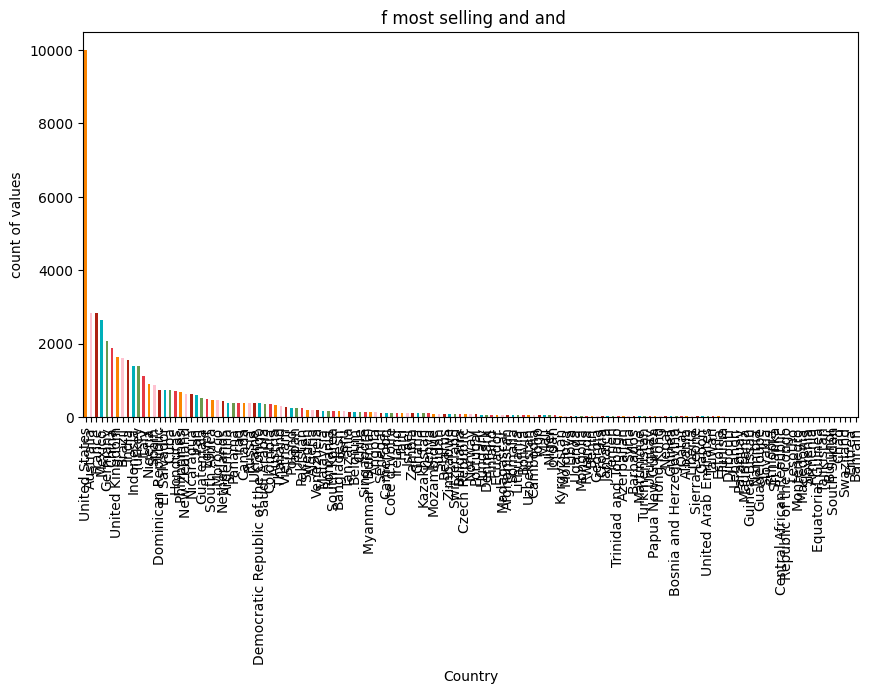

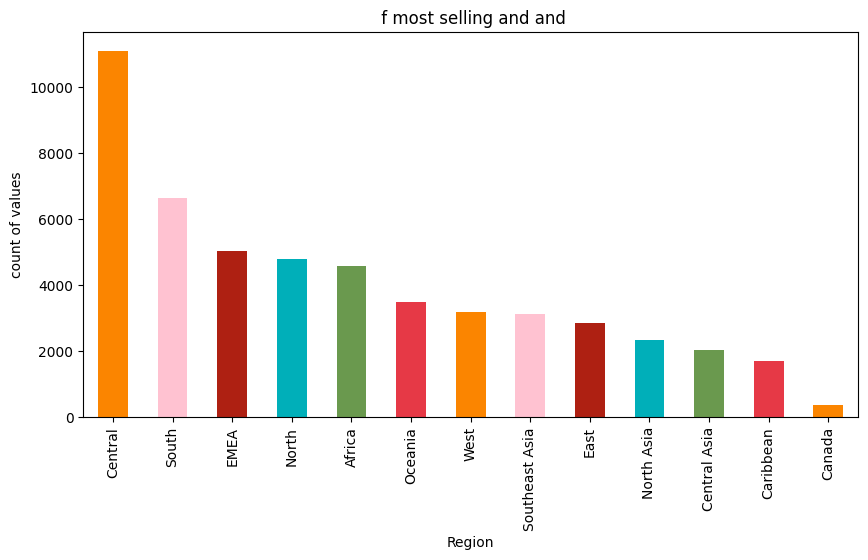

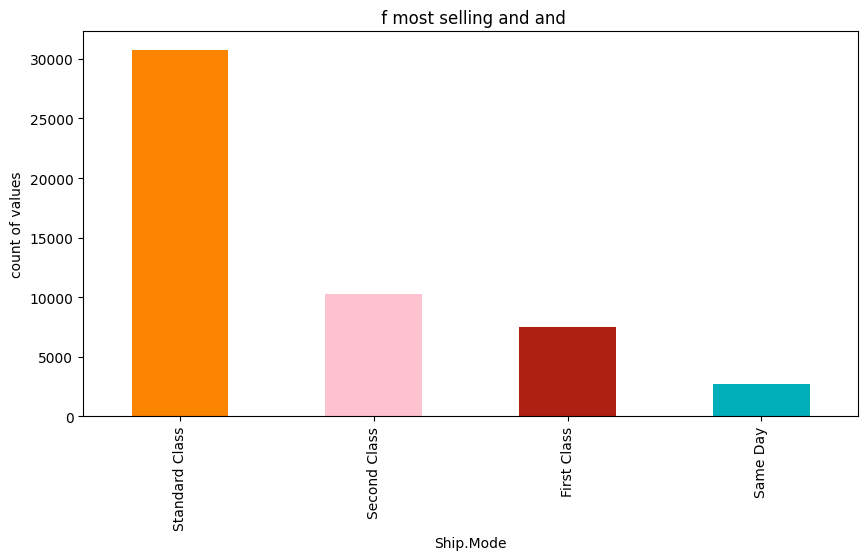

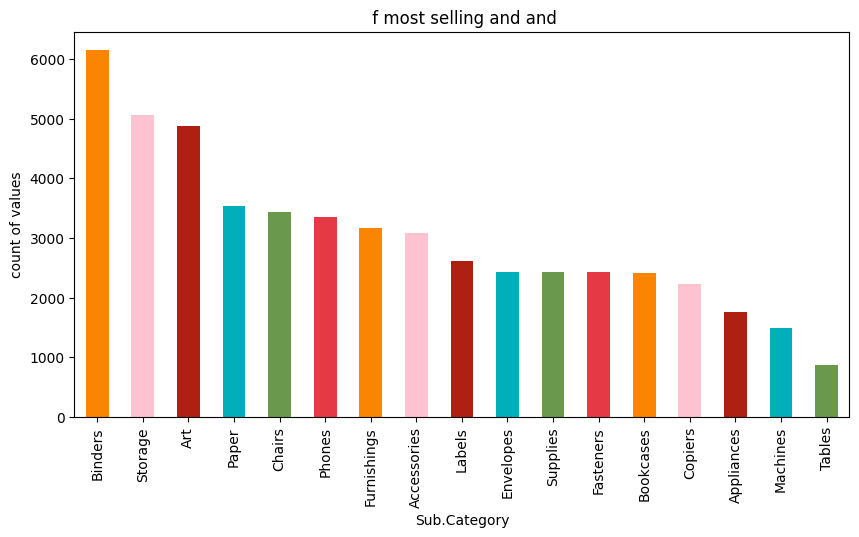

In [43]:
# find the most selling items
colors = ['#fb8500' ,'#ffc2d1' , '#ae2012' , '#00afb9' , '#6a994e' ,'#e63946']

for i in ['Category' , 'Country' ,'Region','Ship.Mode','Sub.Category']:
  data[i].value_counts().sort_values(ascending=False).plot(kind='bar' ,figsize =(10,5),color =colors , title = ' f most selling and and')
  plt.xlabel(i)
  plt.ylabel("count of values")
  plt.xticks(rotation=90)
  plt.show()


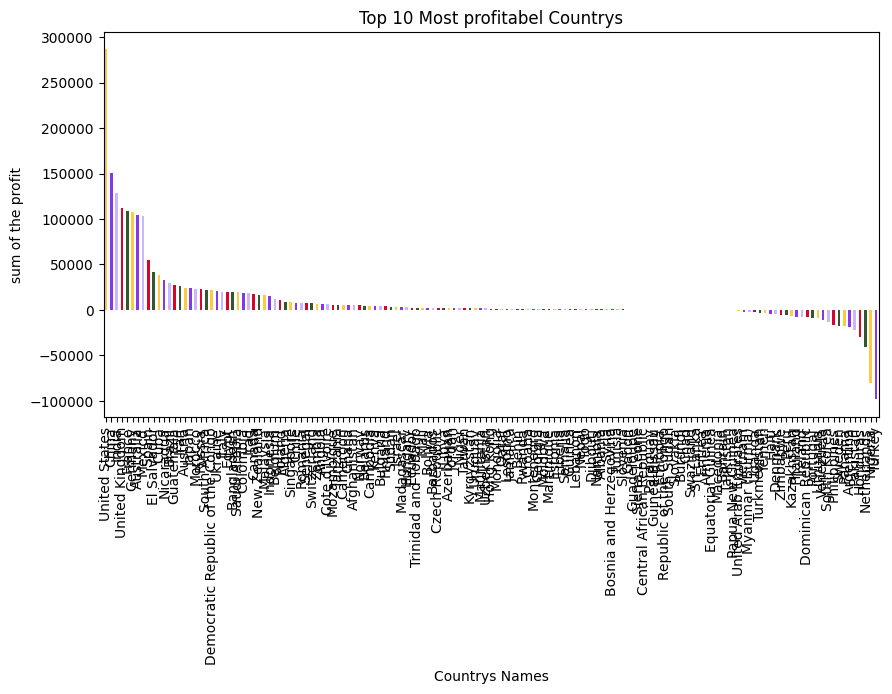

In [44]:
# Visualize the top 10 profitable country
colors = ['#fcca46' ,'#8338ec' ,'#c8b6ff' , '#d90429' , '#31572c']
top_revenue_countys = data.groupby('Country')['Profit'].sum().sort_values(ascending=False)
top_revenue_countys.plot(kind ='bar' , figsize=(10,5),color = colors)
plt.title('Top 10 Most profitabel Countrys')
plt.xlabel("Countrys Names")
plt.ylabel("sum of the profit")
plt.show()

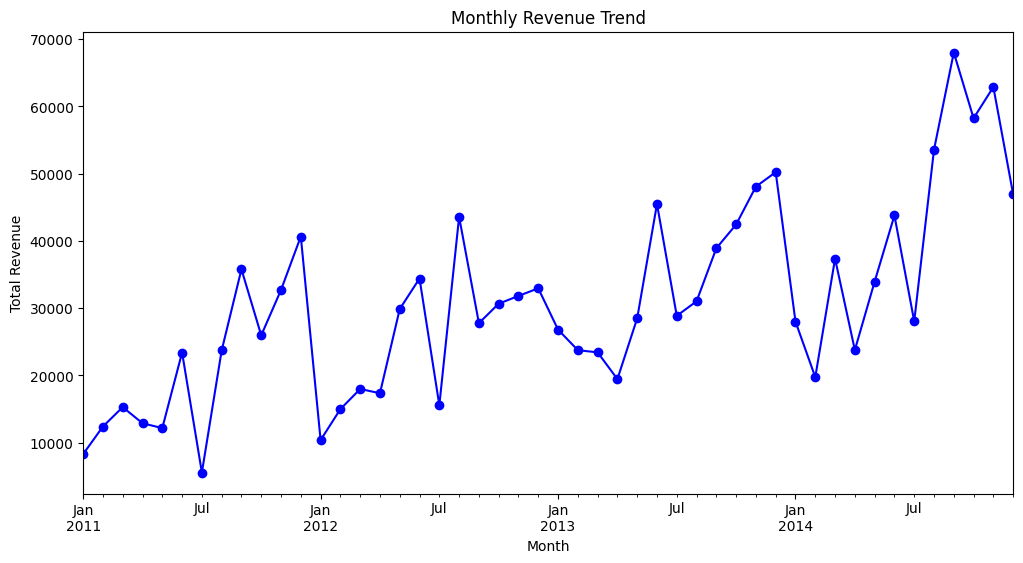

In [45]:
data['Order.Date'] = pd.to_datetime(data['Order.Date'])
month_revenue = data.resample('M' , on = 'Order.Date')['Profit'].sum()

# Visulalization
plt.figure(figsize=(12,6))
month_revenue.plot(kind ='line' , marker ='o' , color= 'blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

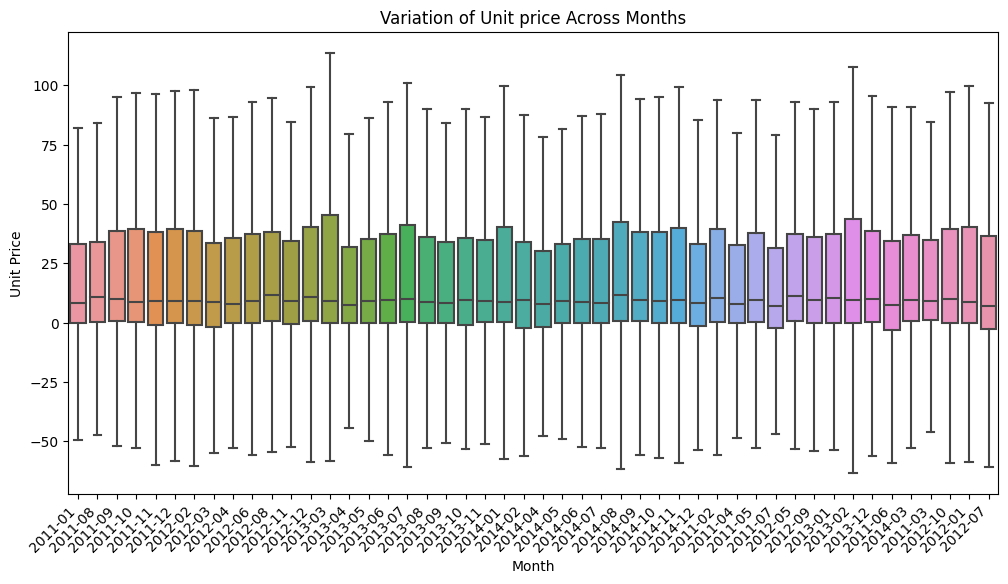

In [46]:
data['Month'] = data['Order.Date'].dt.to_period('M')

# Visualization
plt.figure(figsize = (12,6))
sns.boxplot(x='Month' , y = 'Profit' , data = data , showfliers = False , palette=None)
plt.title('Variation of Unit price Across Months')
plt.xlabel('Month')
plt.ylabel('Unit Price')
plt.xticks(rotation=45 , ha = 'right')
plt.show()

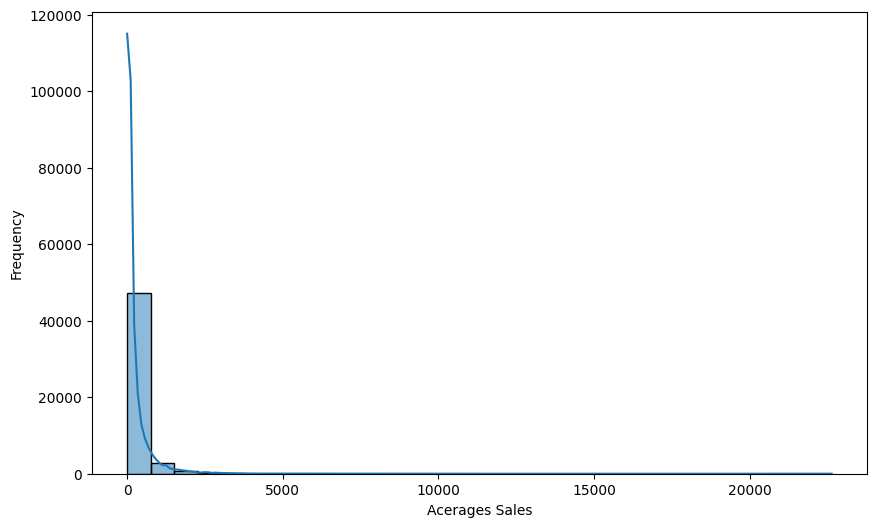

In [47]:
# Distribution of the Sales categorys
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'], bins =30 , kde = True)
plt.xlabel('Acerages Sales')
plt.ylabel("Frequency")
plt.show()

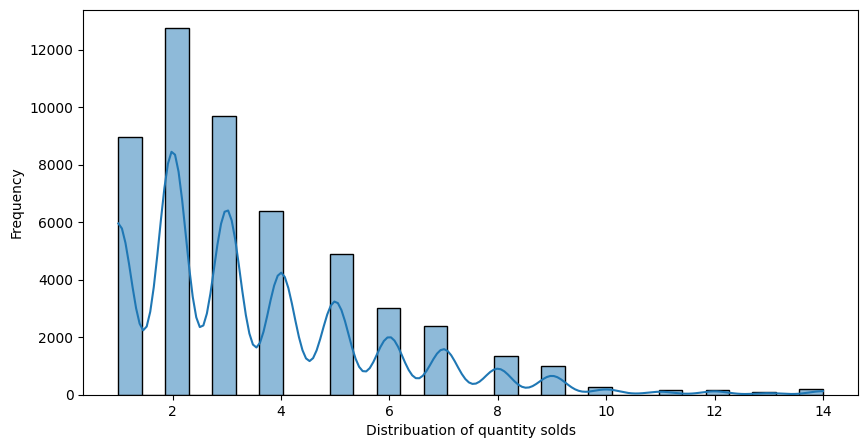

In [48]:
# Distribution of Quantity
plt.figure(figsize = (10,5))
sns.histplot(data['Quantity'], bins =30 , kde = True)
plt.xlabel("Distribuation of quantity solds")
plt.ylabel("Frequency")
plt.show()

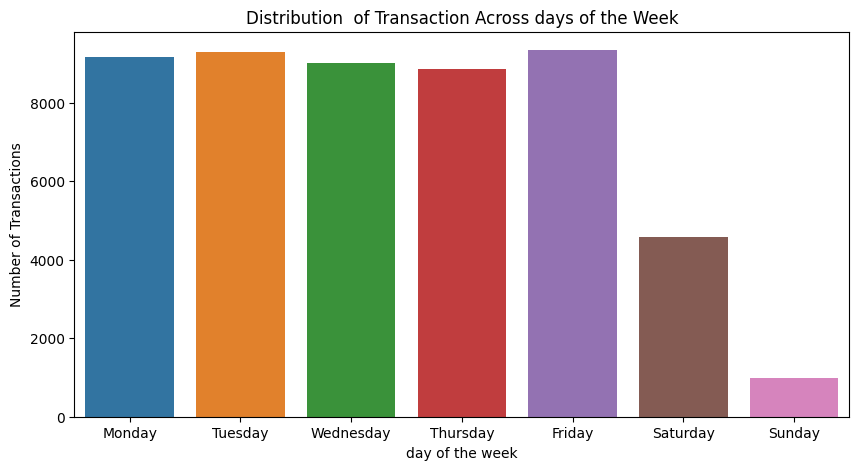

In [49]:
data['Days'] = data['Order.Date'].dt.day_name()
plt.figure(figsize=(10,5))
sns.countplot(x='Days' , data = data , order =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
            'Sunday'])
plt.title('Distribution  of Transaction Across days of the Week')
plt.xlabel("day of the week")
plt.ylabel("Number of Transactions")
plt.show()

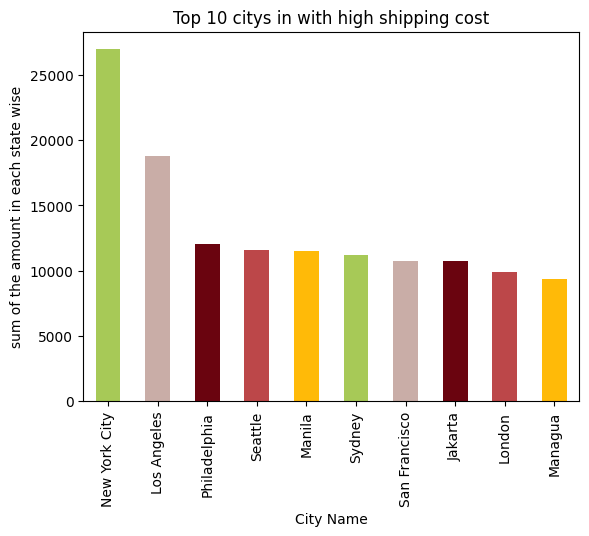

In [50]:
colors = ['#a7c957' ,'#c9ada7' , '#6a040f' ,'#bc4749' ,'#ffba08']
data.groupby('City')['Shipping.Cost'].sum().sort_values(ascending = False).head(10).plot(kind ='bar', title ='Top 10 citys in with high shipping cost' , color = colors)
plt.xlabel('City Name')
plt.ylabel("sum of the amount in each state wise")
plt.show()

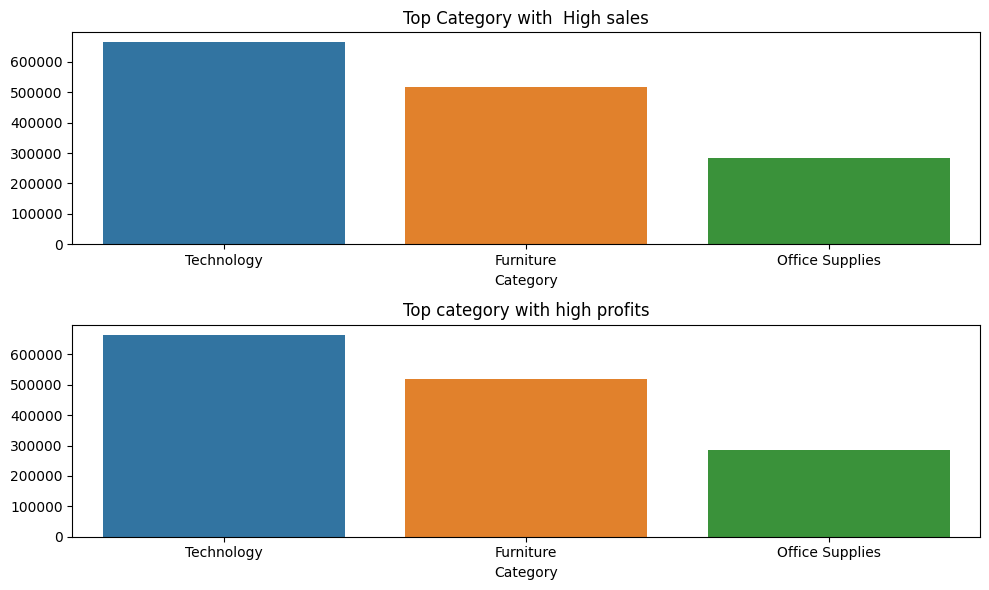

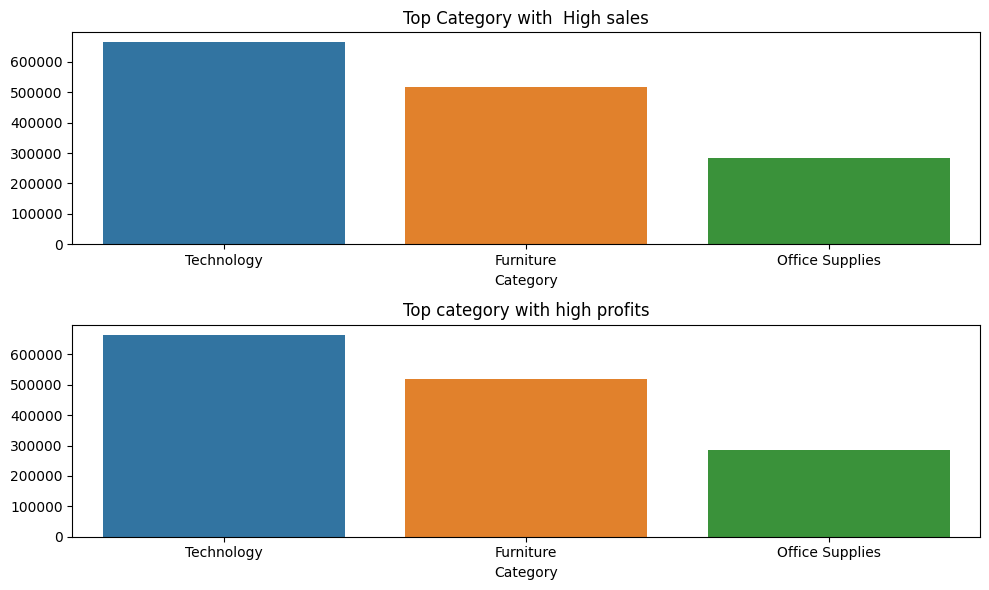

In [33]:
top_category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending =False)
top_category_profit = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)

fig , axes = plt.subplots(nrows=2 , ncols =1 , figsize = (10,6))

sns.barplot(ax = axes[0] , x= top_category_sales.index , y = top_category_profit.values)
axes[0].set_title("Top Category with  High sales")

sns.barplot(ax = axes[1] , x=top_category_sales.index , y = top_category_profit.values)
axes[1].set_title('Top category with high profits')
plt.tight_layout()
plt.show()

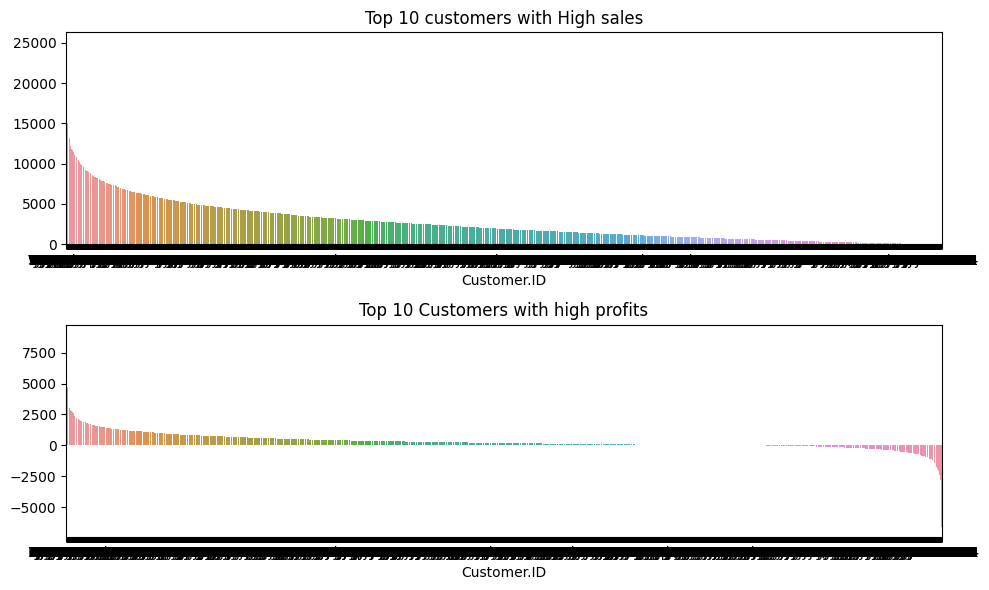

In [52]:
top_customers_sales = data.groupby('Customer.ID')['Sales'].sum().sort_values(ascending=False)
top_customers_profit = data.groupby('Customer.ID')['Profit'].sum().sort_values(ascending=False)

# visualization
fig , axes = plt.subplots(nrows =2 , ncols =1 , figsize = (10,6))

sns.barplot(ax = axes[0] , x = top_customers_sales.index , y = top_customers_sales.values)
axes[0].set_title("Top 10 customers with High sales")

sns.barplot(ax = axes[1] , x= top_customers_profit.index , y = top_customers_profit.values)
axes[1].set_title("Top 10 Customers with high profits")

plt.tight_layout()
plt.show()

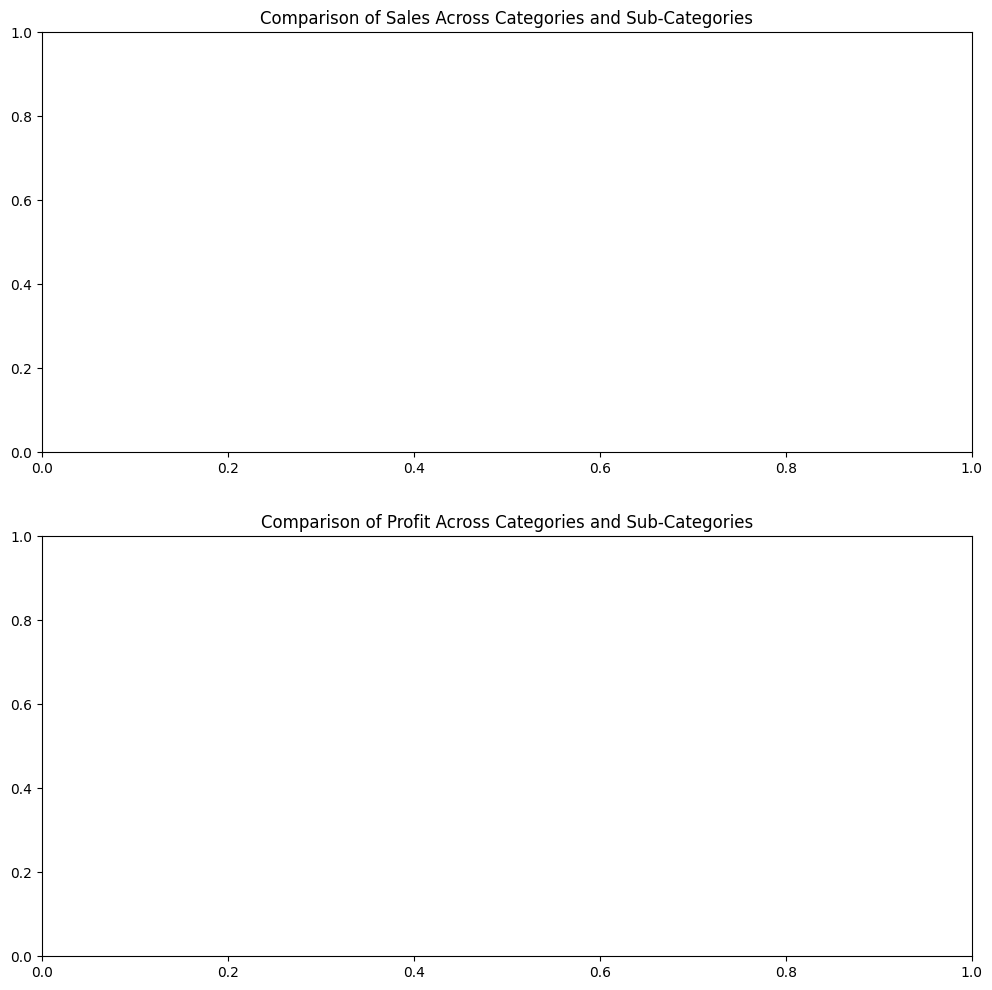

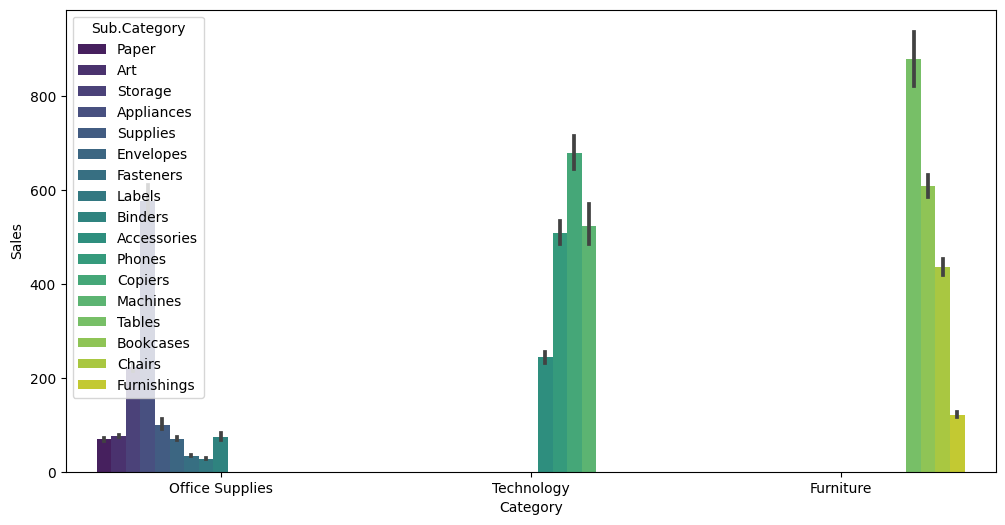

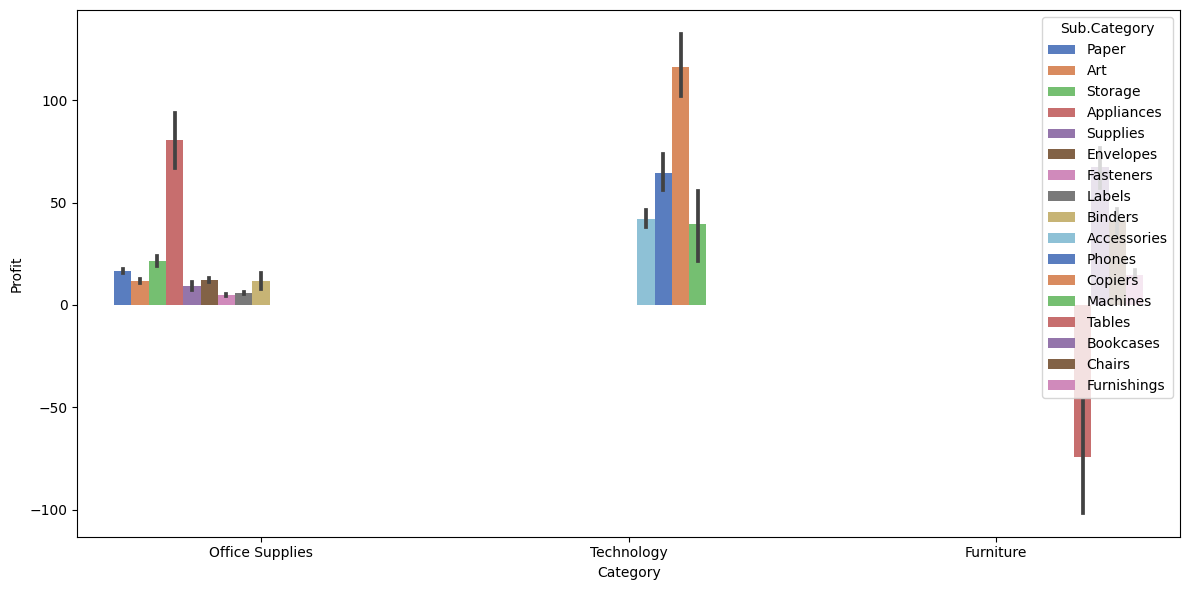

In [53]:
# Comparison Sales across different categories using a bar plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=data, hue='Sub.Category', palette='viridis')
axes[0].set_title('Comparison of Sales Across Categories and Sub-Categories')

# Comparisons Profit across different categories using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=data, hue='Sub.Category', palette='muted')
axes[1].set_title('Comparison of Profit Across Categories and Sub-Categories')
plt.tight_layout()
plt.show()

#Observations

* Office supplies emerge as the top-selling items in the dataset, indicating a consistent demand for these products.
* The United States is identified as the leading country, demonstrating robust business operations and significant sales and profit contributions.
* The Central market stands out as the most demanding, showcasing a strong appetite for products and services in this region.
* Standard Shipmethod and Blinders sub-categories exhibit high sales, reflecting their popularity and widespread demand among consumers.
* The line chart illustrates a generally increasing trend in revenue. However, fluctuations are observed in certain regions, likely influenced by external circumstances or market dynamics.
* Monday, Tuesday, and Friday emerge as the most lucrative days for sales, indicating specific weekdays where the business experiences heightened customer activity.
* New York City stands out for incurring high shipping costs compared to other cities, possibly due to logistical factors or unique shipping requirements.
* The Technology category demonstrates significant success, boasting high sales and profit figures. This suggests a strong market demand for technology-related products.

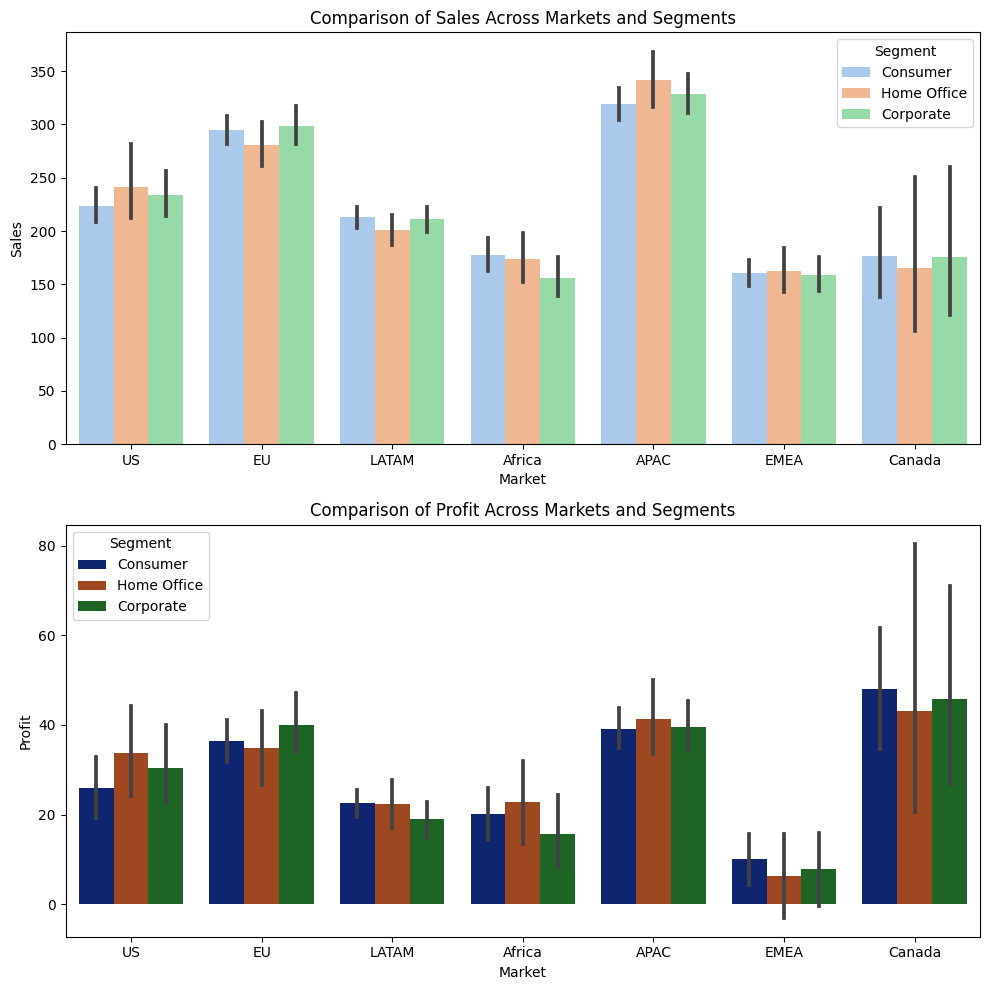

In [54]:
# Create subplots for Sales and Profit across different markets
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Compare Sales across different markets using a bar plot
sns.barplot(ax=axes[0], x='Market', y='Sales', data=data, hue='Segment', palette='pastel')
axes[0].set_title('Comparison of Sales Across Markets and Segments')

# Compare Profit across different markets using a bar plot
sns.barplot(ax=axes[1], x='Market', y='Profit', data=data, hue='Segment', palette='dark')
axes[1].set_title('Comparison of Profit Across Markets and Segments')
plt.tight_layout()
plt.show()

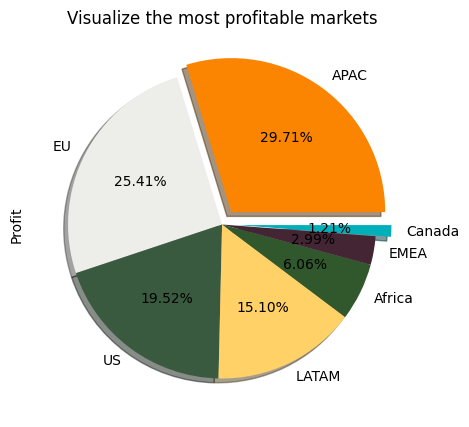

In [55]:
# Which market is most profitable
colors=['#fb8500','#edede9','#3a5a40','#ffd166','#31572c','#432534','#00afb9']
most_profit_markets=data.groupby('Market')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
most_profit_markets.plot(kind='pie', explode=[0.1,0,0,0,0,0,0.1],
labels=['APAC', 'EU', 'US', 'LATAM', 'Africa', 'EMEA', 'Canada'],
colors=colors, autopct='%1.2f%%', pctdistance=0.6, shadow=True)
plt.title("Visualize the most profitable markets")
plt.show()

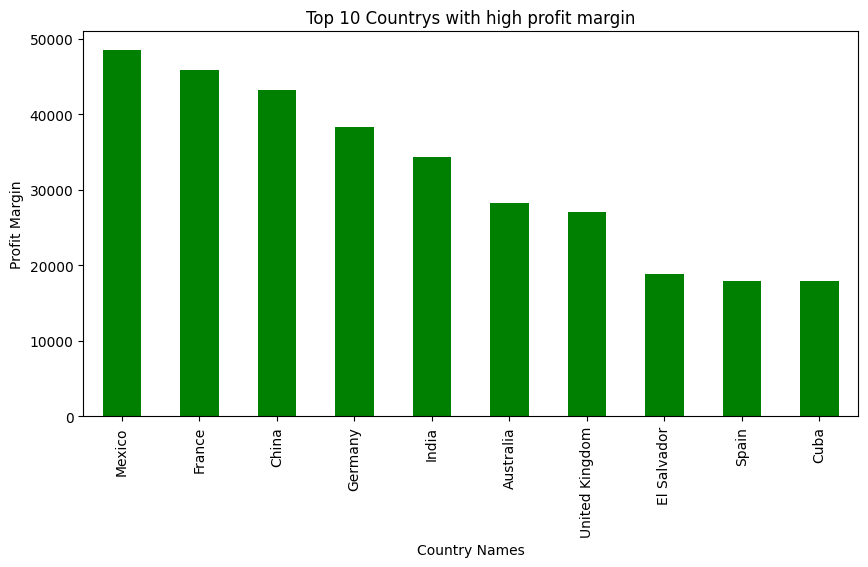

In [56]:
# Let's find the profit margin
data['Profit_margin']=(data['Profit']/data['Sales'])*100
# Find the country wise profit margin in the data
find_profit_margin=data.groupby('Country')['Profit_margin'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
find_profit_margin.plot(kind='bar',color='green')
plt.title("Top 10 Countrys with high profit margin")
plt.xlabel("Country Names")
plt.ylabel("Profit Margin")
plt.show()

In [58]:
# Create a data sum of the values in each segment and region in sales and profit and Quantity
segmented_data = data.groupby(['Segment', 'Region']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

segmented_data.head(). style.background_gradient(cmap='twilight_r')

,Segment,Region,Sales,Profit,Quantity
0,Consumer,Africa,423751,47772.099000,5503
1,Consumer,Canada,35717,9677.700000,454
2,Consumer,Caribbean,162351,19868.446280,3107
3,Consumer,Central,1480033,150540.096520,21655
4,Consumer,Central Asia,369052,69196.074000,3935


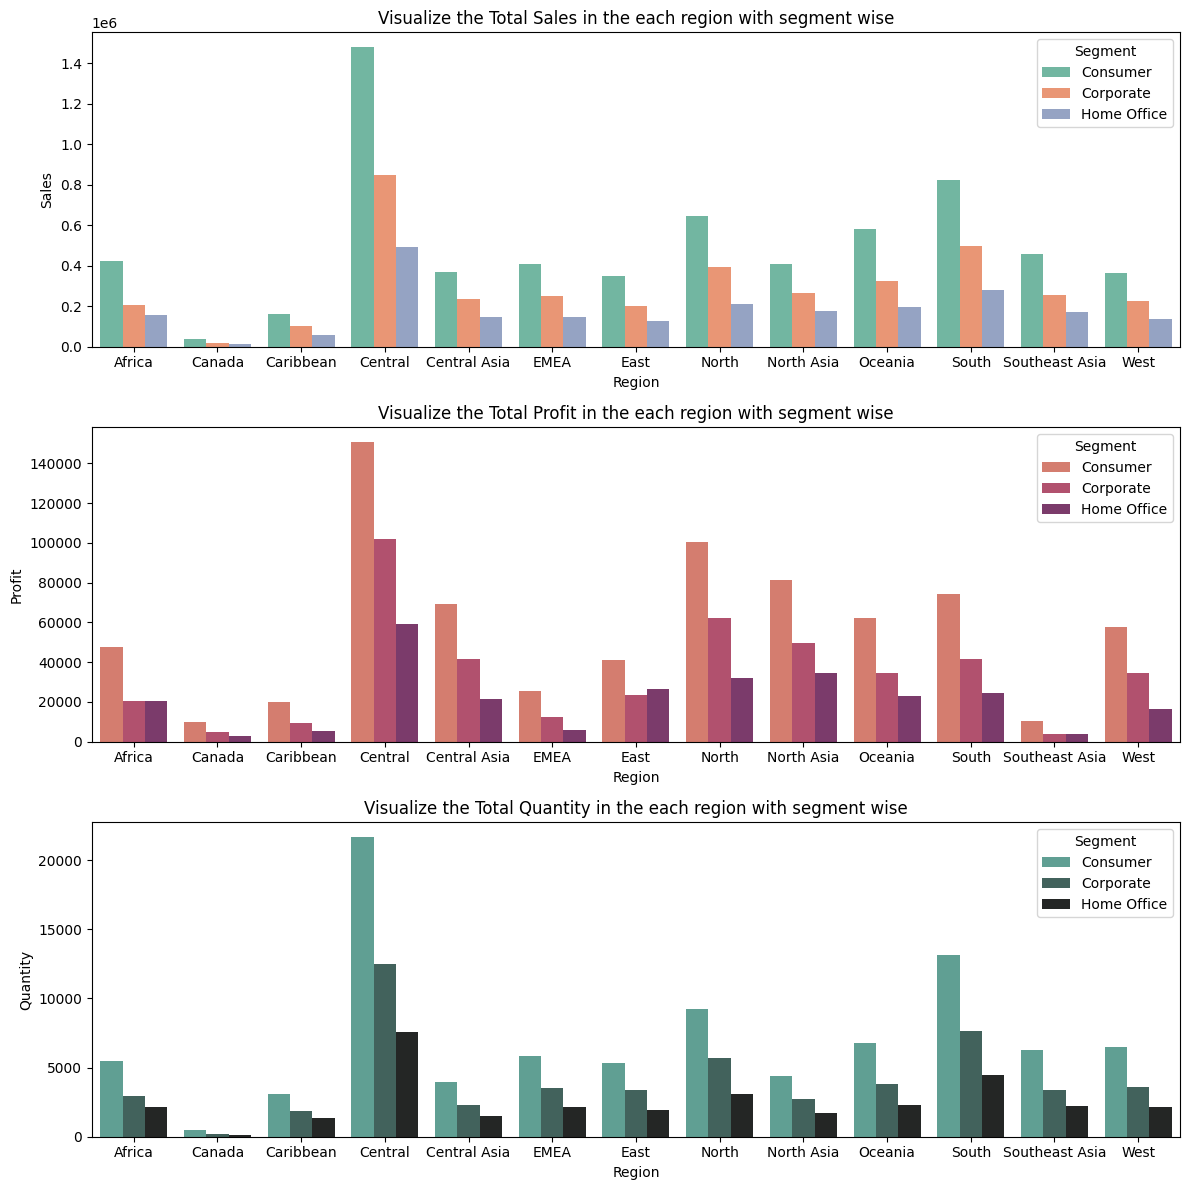

In [59]:
# Visualize the Segment data using the barplots with three categories
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(12,12))
# Visualization of the region and sales with segment
sns.barplot(ax=axes[0],x='Region',y='Sales',hue='Segment',data=segmented_data,palette='Set2')
axes[0].set_title("Visualize the Total Sales in the each region with segment wise")
# Visualization of the region and Profit with segment
sns.barplot(ax=axes[1],x='Region',y='Profit',hue='Segment',data=segmented_data,palette='flare')
axes[1].set_title("Visualize the Total Profit in the each region with segment wise")
# Visualization of the Region and Quantity with segment
sns.barplot(ax=axes[2],x='Region',y='Quantity',hue='Segment',data=segmented_data,palette='dark:#5A9_r')
axes[2].set_title("Visualize the Total Quantity in the each region with segment wise")
plt.tight_layout()
plt.show()

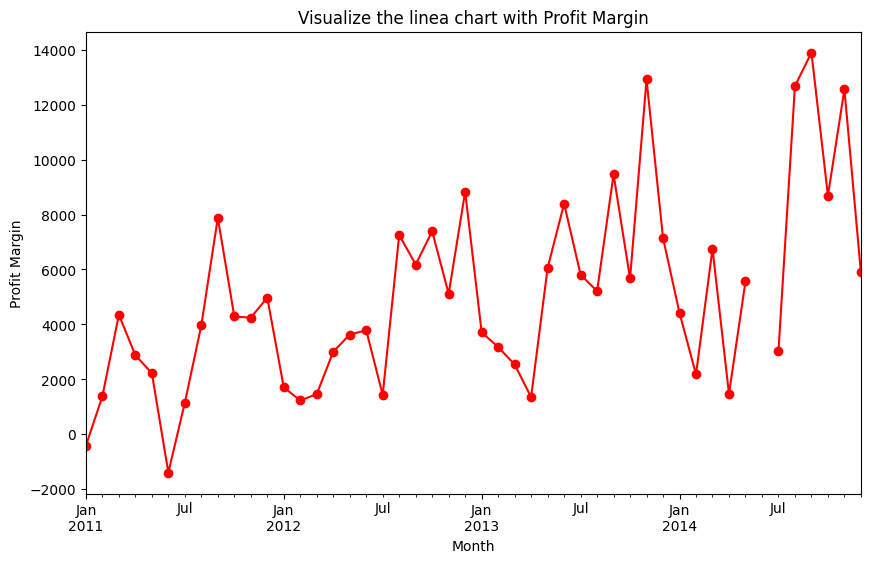

In [60]:
# Visualize the monthly profit Margin using the line charts
plt.figure(figsize=(10,6))
monthly_profit_margin=data.resample('M',on='Order.Date')['Profit_margin'].sum()
monthly_profit_margin.plot(kind='line',marker='o',color='red')
plt.title("Visualize the linea chart with Profit Margin")
plt.xlabel('Month')
plt.ylabel('Profit Margin')
plt.show()

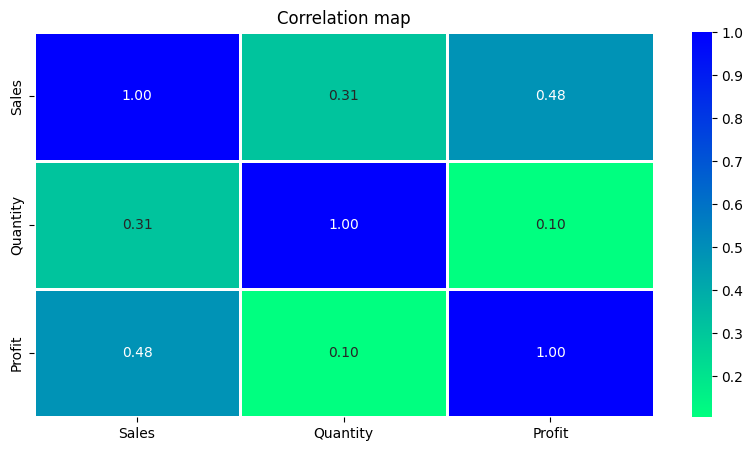

In [61]:
# Correlation Matrix
corr=data[['Sales','Quantity','Profit']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap='winter_r',annot=True,fmt=".2f", annot_kws=None, linewidths=1, linecolor="white")
plt.title("Correlation map")
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


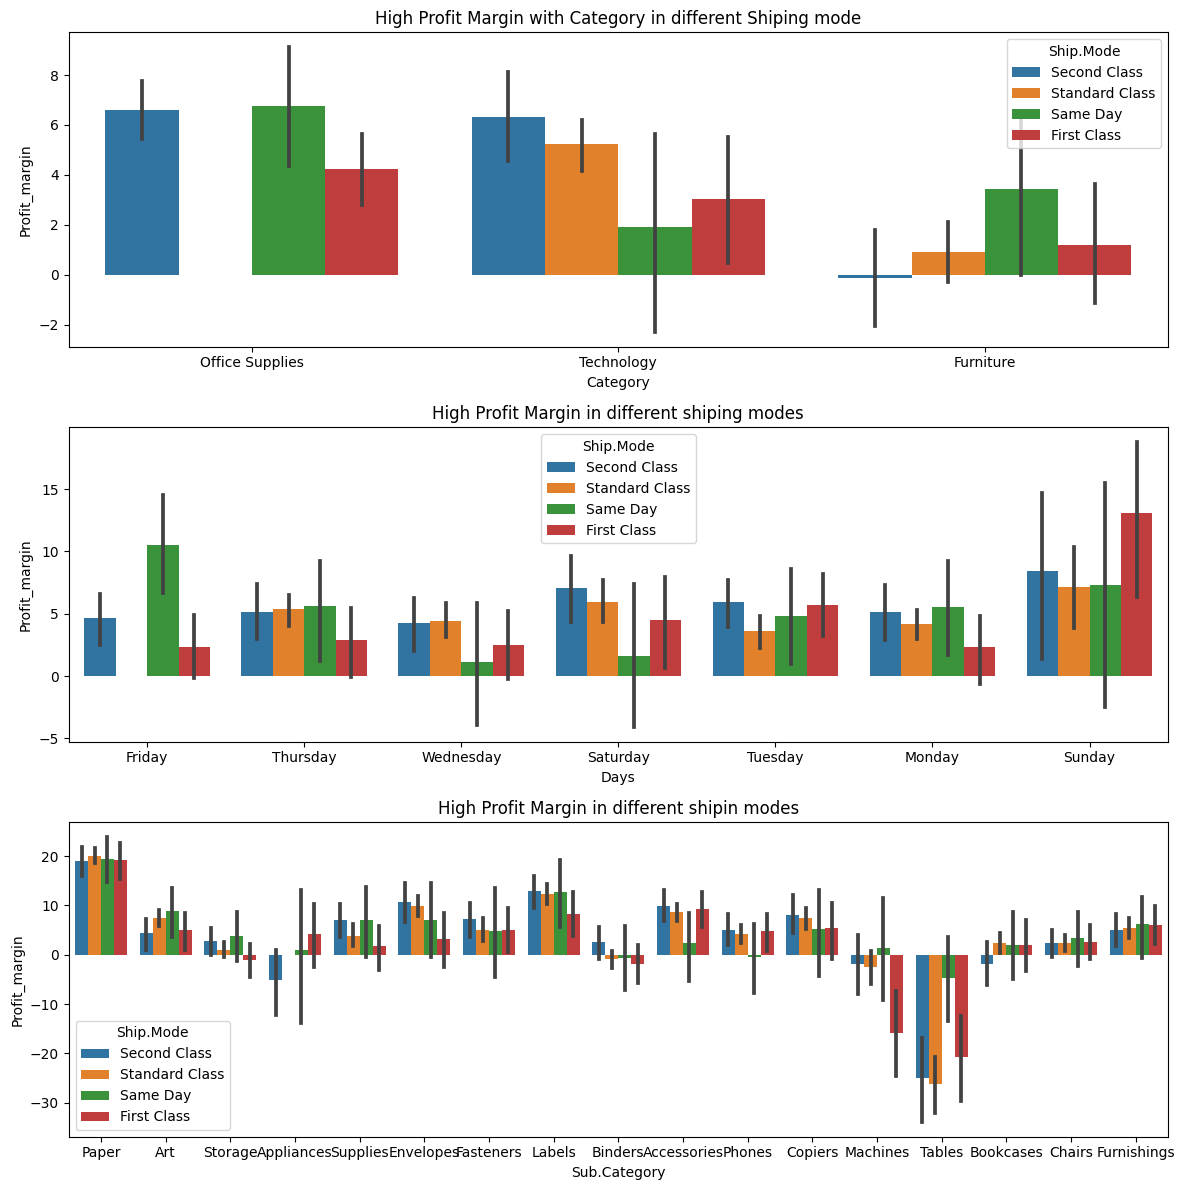

In [62]:
# Visualize the High Profit Marigin with Category and Shiping method
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(12,12))

sns.barplot(ax=axes[0],x='Category',data=data,y='Profit_margin',hue='Ship.Mode')
axes[0].set_title("High Profit Margin with Category in different Shiping mode")
# Visualization
sns.barplot(ax=axes[1],x='Days',data=data,y='Profit_margin',hue='Ship.Mode')
axes[1].set_title("High Profit Margin in different shiping modes")

sns.barplot(ax=axes[2],x='Sub.Category',y='Profit_margin',data=data,hue='Ship.Mode')
axes[2].set_title("High Profit Margin in different shipin modes")

plt.tight_layout()
plt.show()

In [63]:
# Create a dataframe for the  total Shiping cost of the ship mode and subcatgory  wise
total_shiping_cost=pd.DataFrame(data.groupby(['Ship.Mode','Sub.Category'])['Shipping.Cost'].sum().sort_values(ascending=False).unstack())
total_shiping_cost.style.background_gradient(cmap='gist_stern_r')

Sub.Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Ship.Mode,,,,,,,,,,,,,,,,,
First Class,18573.511000,25529.181000,9725.809000,11189.514000,37291.713000,36815.383000,34573.788540,3848.480000,2081.082000,8138.836000,2013.141000,17669.271000,6207.919000,42112.784000,26148.300000,5568.071000,20615.758000
Same Day,8853.045000,9660.868000,4104.699000,3597.853000,12170.778000,14827.863000,15564.946000,1846.407000,647.880000,3595.837000,634.521000,8327.384000,2670.322000,14563.436000,9241.080000,1542.371000,4124.426000
Second Class,20226.065000,27825.979000,9373.586000,9911.575000,31735.033000,40276.780000,36024.144360,4502.906000,2143.516000,8801.605000,1898.227000,15082.854000,6086.880000,44702.004000,28900.063000,7479.312000,19141.261000
Standard Class,35860.713000,45284.558000,18083.048000,23482.770000,74284.443000,72309.326000,73333.326000,8349.695000,4180.860000,20210.488000,3513.786000,38056.339500,11695.724000,83524.268000,56256.589000,10221.773000,35979.949000
